# Deep CNN Image Classifier (Bodybuilding Poses)

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


## Label Index

In [8]:
labels = {
    0: "Negative_Sample",
    1: "Front Double Bicep",
    2: "Back Double Bicep",
    3: "Side Chest",
    4: "Abs and Thighs"
}
print(labels)


{0: 'Negative_Sample', 1: 'Front Double Bicep', 2: 'Back Double Bicep', 3: 'Side Chest', 4: 'Abs and Thighs'}


## Load and Preprocess Images

In [9]:
base_dir = os.path.join(os.getcwd(), 'ComputerVision')  # Removed duplicate 'src'
print(f"Checking if directory exists: {base_dir}")
print(f"Directory exists: {os.path.exists(base_dir)}")
print(f"Contents of directory:")
print(os.listdir(base_dir))

img_height, img_width = 150, 150
batch_size = 16

# ImageDataGenerator for rescaling and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

print("\nAttempting to load data...")
train_data = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Checking if directory exists: c:\Users\ryant\OneDrive\Documents\GitHub\AI-Based-Fake-Job-Posting-Detector\src\ComputerVision
Directory exists: True
Contents of directory:
['4_pose_detection_image.py', '4_pose_detection_webcam.py', 'Abs and Thighs', 'Back Double Bicep', 'Front Double Bicep', 'keras_model.h5', 'labels.txt', 'Negative_Sample', 'Side Chest']

Attempting to load data...
Found 165 images belonging to 5 classes.
Found 40 images belonging to 5 classes.


## Sample Images from Training Data

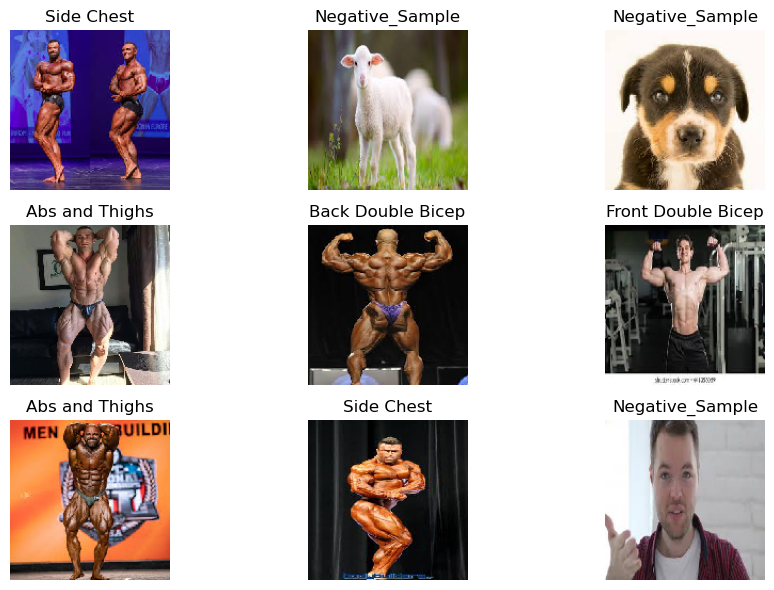

In [10]:
class_names = list(train_data.class_indices.keys())

plt.figure(figsize=(10, 6))
for i in range(9):
    img, label = train_data.next()
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img[0])
    plt.title(class_names[np.argmax(label[0])])
    plt.axis("off")
plt.tight_layout()
plt.show()


## Build CNN Model

In [11]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),
    BatchNormalization(),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),
    
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                        

## Train the Model

In [12]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10
11/11 [==============================] - 12s 690ms/step - loss: 5.7086 - accuracy: 0.4606 - val_loss: 1.4059 - val_accuracy: 0.4250
Epoch 2/10
11/11 [==============================] - 5s 466ms/step - loss: 1.8225 - accuracy: 0.7515 - val_loss: 1.5204 - val_accuracy: 0.3500
Epoch 3/10
11/11 [==============================] - 4s 376ms/step - loss: 0.7517 - accuracy: 0.8909 - val_loss: 2.3790 - val_accuracy: 0.2750
Epoch 4/10
11/11 [==============================] - 4s 380ms/step - loss: 0.4435 - accuracy: 0.9273 - val_loss: 5.1640 - val_accuracy: 0.2000
Epoch 5/10
11/11 [==============================] - 4s 351ms/step - loss: 0.2470 - accuracy: 0.9455 - val_loss: 5.7616 - val_accuracy: 0.2000
Epoch 6/10
11/11 [==============================] - 4s 359ms/step - loss: 0.0508 - accuracy: 0.9818 - val_loss: 7.2671 - val_accuracy: 0.2000
Epoch 7/10
11/11 [==============================] - 4s 346ms/step - loss: 0.0253 - accuracy: 0.9879 - val_loss: 8.1014 - val_accuracy: 0.2000
Epoch

## Training History

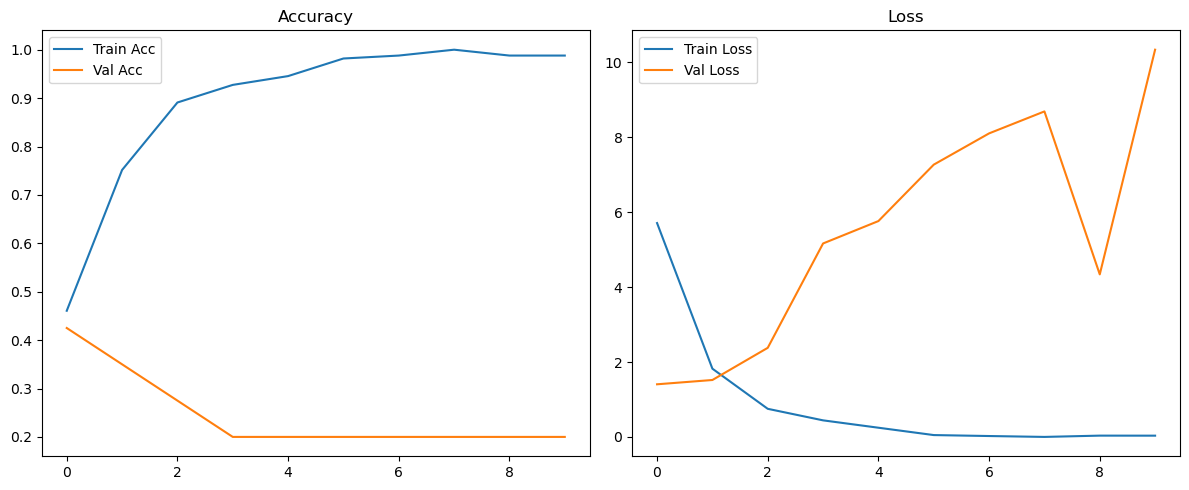

In [13]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()


## Model Evaluation

3/3 [==============================] - 1s 82ms/step
                    precision    recall  f1-score   support

    Abs and Thighs       0.00      0.00      0.00         8
 Back Double Bicep       0.00      0.00      0.00         8
Front Double Bicep       0.00      0.00      0.00         8
   Negative_Sample       0.20      1.00      0.33         8
        Side Chest       0.00      0.00      0.00         8

          accuracy                           0.20        40
         macro avg       0.04      0.20      0.07        40
      weighted avg       0.04      0.20      0.07        40


c:\Users\ryant\.conda\envs\cv-env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ryant\.conda\envs\cv-env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ryant\.conda\envs\cv-env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


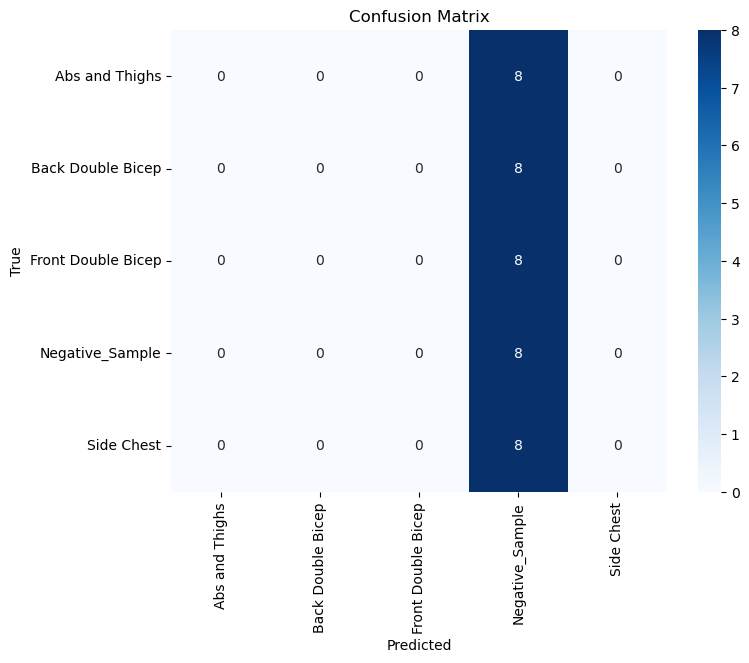

In [14]:
val_data.reset()
predictions = model.predict(val_data)
y_pred = np.argmax(predictions, axis=1)
y_true = val_data.classes

print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
